In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
otto_data = pd.read_csv('train.csv')
print(otto_data.columns)

Index(['id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48',
       'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54',
       'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60',
       'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66',
       'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72',
       'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78',
       'feat_79', 'feat_80', 'feat_81', 'feat_82', 'fe

In [6]:
otto_data.shape

(61878, 95)

In [7]:
otto_data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,...,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1


In [8]:
otto_data.groupby('target').size()

target
Class_1     1929
Class_2    16122
Class_3     8004
Class_4     2691
Class_5     2739
Class_6    14135
Class_7     2839
Class_8     8464
Class_9     4955
dtype: int64

In [9]:
otto_data.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,1.252869,0.140874,0.480979,1.696693,1.284398,1.413459,0.366108,0.575423,0.551699,0.471525,0.204014,0.729969,0.142522,2.643880,1.534520,0.563108,0.696613,0.238970,0.275768,0.150312,0.148680,1.043796,0.696516,0.946411,0.666263,0.709089,0.263632,0.582129,0.485585,...,2.072465,0.323120,0.303775,0.309108,0.697970,0.388603,1.029930,0.239746,1.187563,0.168590,1.256796,0.222228,0.571706,2.897653,0.392902,0.811128,0.892789,0.319290,0.858722,0.591050,0.579851,0.726817,0.748457,0.124196,0.366415,0.300446,0.698067,0.078461,0.187983,0.496719,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340,3.042333,0.567089,2.014697,3.163212,3.862236,2.226163,1.477436,1.335985,4.636145,1.438727,0.696050,1.446220,0.782979,4.629015,2.332994,1.710305,2.873222,0.828112,1.901294,1.640880,0.897354,2.416849,1.310202,3.368622,3.197965,2.555119,0.756934,1.602579,3.298315,...,4.113319,0.998743,1.925806,1.082148,3.983722,2.577693,3.028469,1.017553,2.666742,0.946158,3.402080,0.783052,1.361874,4.974322,1.761054,4.111091,1.941368,1.162443,2.411646,5.783233,3.757822,3.200095,2.920038,0.906621,2.778317,1.285569,2.245671,0.461244,0.836269,2.434921,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [10]:
print(otto_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       61878 non-null  int64 
 1   feat_1   61878 non-null  int64 
 2   feat_2   61878 non-null  int64 
 3   feat_3   61878 non-null  int64 
 4   feat_4   61878 non-null  int64 
 5   feat_5   61878 non-null  int64 
 6   feat_6   61878 non-null  int64 
 7   feat_7   61878 non-null  int64 
 8   feat_8   61878 non-null  int64 
 9   feat_9   61878 non-null  int64 
 10  feat_10  61878 non-null  int64 
 11  feat_11  61878 non-null  int64 
 12  feat_12  61878 non-null  int64 
 13  feat_13  61878 non-null  int64 
 14  feat_14  61878 non-null  int64 
 15  feat_15  61878 non-null  int64 
 16  feat_16  61878 non-null  int64 
 17  feat_17  61878 non-null  int64 
 18  feat_18  61878 non-null  int64 
 19  feat_19  61878 non-null  int64 
 20  feat_20  61878 non-null  int64 
 21  feat_21  61878 non-null  int64 
 22

Text(0, 0.5, 'Counts')

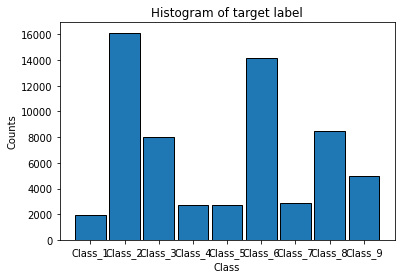

In [11]:
plt.hist(otto_data['target'], rwidth = 0.9, edgecolor = 'black', bins = np.arange(0, 10) - 0.5)

plt.title('Histogram of target label')
plt.xlabel("Class")
plt.ylabel("Counts")

In [12]:
otto_data.isnull().sum()

id         0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
          ..
feat_90    0
feat_91    0
feat_92    0
feat_93    0
target     0
Length: 95, dtype: int64

In [13]:
otto_data.isna().sum()

id         0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
          ..
feat_90    0
feat_91    0
feat_92    0
feat_93    0
target     0
Length: 95, dtype: int64

In [14]:
# features
features = []

for i in range(1, 94):
    features.append('feat_{}'.format(i))

X = otto_data[features]

# responses
y = otto_data.target

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [16]:
# model selection
models = []

models.append(("KNN", KNeighborsClassifier()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("MNB", MultinomialNB()))
models.append(("GNB", GaussianNB()))
models.append(("RF", RandomForestClassifier()))

## **Train/test split with/without stratification**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# With stratification
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = otto_data.target, random_state = 0)

# Without stratification, note: if shuffle = False then stratify must be None
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = None, random_state = 0)
print(np.shape(X_train), np.shape(y_train))

(46408, 93) (46408,)


In [18]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Accuracy Score': scores}).sort_values(by = 'Accuracy Score', ascending = False)
print(tr_split)

  Name  Accuracy Score
4   RF        0.805688
0  KNN        0.770459
1   DT        0.710795
2  MNB        0.660504
3  GNB        0.610666


## **Random Forest with the best parameters from GridSearch**

In [19]:
RF_best = RandomForestClassifier(bootstrap = False, criterion = 'gini', n_estimators = 500)
RF_best.fit(X_train, y_train)
y_pred = RF_best.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.812863606981254


## **Increase/decrease training samples - keep the test set fixed**

In [20]:
N = [46408, 37126, 27845, 18563, 9282, 4641, 2320]
prop = [100, 80, 60, 40, 20, 10, 5]

results = []

for n in N:
    X_train_new = X_train[:n]
    y_train_new = y_train[:n]

    names = []
    scores = []

    for name, model in models:
        model.fit(X_train_new, y_train_new)
        y_pred = model.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
        names.append(name)

    tr_split = pd.DataFrame({'Name': names, 'Score': scores}).sort_values(by = 'Score', ascending = False)
    print("-"*20)
    print(tr_split)
    
    results.append(tr_split.to_numpy())

--------------------
  Name     Score
4   RF  0.805107
0  KNN  0.770459
1   DT  0.713639
2  MNB  0.660504
3  GNB  0.610666
--------------------
  Name     Score
4   RF  0.798125
0  KNN  0.765417
1   DT  0.700065
2  MNB  0.661215
3  GNB  0.610407
--------------------
  Name     Score
4   RF  0.795475
0  KNN  0.760698
1   DT  0.693407
2  MNB  0.663672
3  GNB  0.607498
--------------------
  Name     Score
4   RF  0.784939
0  KNN  0.748222
1   DT  0.681125
2  MNB  0.661732
3  GNB  0.606529
--------------------
  Name     Score
4   RF  0.770653
0  KNN  0.734712
1   DT  0.658694
2  MNB  0.658500
3  GNB  0.566322
--------------------
  Name     Score
4   RF  0.747447
0  KNN  0.718681
2  MNB  0.664900
1   DT  0.640595
3  GNB  0.521590
--------------------
  Name     Score
4   RF  0.727279
0  KNN  0.691467
2  MNB  0.677182
1   DT  0.618487
3  GNB  0.489981


In [21]:
RF = []
KNN = []
DT = []
GNB = []
MNB = []

for r in results:
    for i in range(5):
      if r[i, 0] == 'RF':
        RF_i = i
      elif r[i, 0] == 'KNN':
        KNN_i = i
      elif r[i, 0] == 'DT':
        DT_i = i
      elif r[i, 0] == 'MNB':
        MNB_i = i
      elif r[i, 0] == 'GNB':
        GNB_i = i

    RF.append(r[RF_i, 1])
    KNN.append(r[KNN_i, 1])
    DT.append(r[DT_i, 1])
    MNB.append(r[MNB_i, 1])
    GNB.append(r[GNB_i, 1])

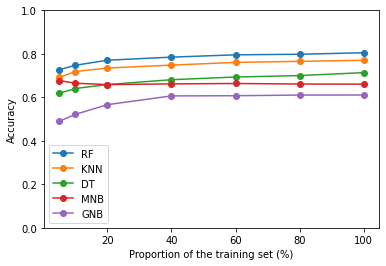

In [22]:
plt.plot(prop, RF, 'o-', label = 'RF')
plt.plot(prop, KNN, 'o-', label = 'KNN')
plt.plot(prop, DT, 'o-', label = 'DT')
plt.plot(prop, MNB, 'o-', label = 'MNB')
plt.plot(prop, GNB, 'o-', label = 'GNB')
plt.legend()
plt.ylim([0, 1])
plt.xlabel('Proportion of the training set (%)')
plt.ylabel('Accuracy')
plt.show()

In [24]:
# Stratified cross-validation, gives better answer compared to without cross-validation
strat_k_fold = StratifiedKFold(n_splits = 10, random_state = 10, shuffle = True) # if shuffle = FALSE chunk gets error

names = []
scores = []

for name, model in models:
    score = cross_val_score(model, X, y, cv = strat_k_fold, scoring = 'accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Accuracy Score': scores}).sort_values(by = 'Accuracy Score', ascending = False)
print(kf_cross_val)

  Name  Accuracy Score
4   RF        0.811112
0  KNN        0.778952
1   DT        0.716070
2  MNB        0.662481
3  GNB        0.615162


## **Undersampling**

In [25]:
# pip install -U imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state = 0)
X_undsamp, y_undsamp = undersample.fit_resample(X, y)

#Keep the test set fixed, i.e. we are doing udersampling only on the training set
X_undsamp_, y_undsamp_ = undersample.fit_resample(X_train, y_train)

In [26]:
print(X_undsamp.shape, y_undsamp.shape)

(17361, 93) (17361,)


In [27]:
print(np.unique(y_undsamp))

['Class_1' 'Class_2' 'Class_3' 'Class_4' 'Class_5' 'Class_6' 'Class_7'
 'Class_8' 'Class_9']


Text(0, 0.5, 'Counts')

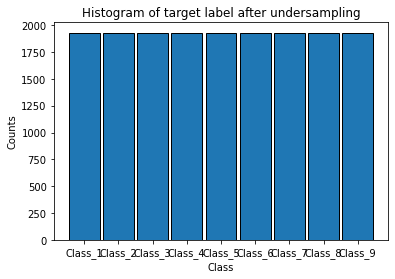

In [28]:
plt.hist(y_undsamp, rwidth = 0.9, edgecolor = 'black', bins = np.arange(0, 10) - 0.5)

plt.title('Histogram of target label after undersampling')
plt.xlabel("Class")
plt.ylabel("Counts")

In [29]:
# Train/test split - with undersampling
X_undsamp_train, X_undsamp_test, y_undsamp_train, y_undsamp_test = train_test_split(X_undsamp, y_undsamp, stratify = None, random_state = 0)

In [30]:
names = []
accuracy_scores = []
precision_scores = []
precision_scores_onevsall = []
recall_scores = []
recall_scores_onevsall = []
f1_scores = []
f1_scores_onevsall = []

for name, model in models:
    model.fit(X_undsamp_train, y_undsamp_train)
    y_pred = model.predict(X_undsamp_test)
    accuracy_scores.append(accuracy_score(y_undsamp_test, y_pred))
    precision_scores.append(precision_score(y_undsamp_test, y_pred, average = 'weighted'))
    precision_scores_onevsall.append(precision_score(y_undsamp_test, y_pred, average = None))
    recall_scores.append(recall_score(y_undsamp_test, y_pred, average = 'weighted'))
    recall_scores_onevsall.append(recall_score(y_undsamp_test, y_pred, average = None))
    f1_scores.append(f1_score(y_undsamp_test, y_pred, average = 'weighted'))
    f1_scores_onevsall.append(f1_score(y_undsamp_test, y_pred, average = None))
    names.append(name)

In [31]:
#Overall metrics
tr_split_all = pd.DataFrame({'Name': names, 'Accuracy Score': accuracy_scores, 'Precision Score': precision_scores, 'Recall Score': recall_scores, 'F1 Score': f1_scores}).sort_values(by = 'Accuracy Score', ascending = False)
tr_split_all

,Name,Accuracy Score,Precision Score,Recall Score,F1 Score
4,RF,0.786915,0.790310,0.786915,0.788224
0,KNN,0.720111,0.730705,0.720111,0.722997
2,MNB,0.674038,0.683389,0.674038,0.671630
1,DT,0.641327,0.645301,0.641327,0.643044
3,GNB,0.600092,0.618003,0.600092,0.593373


In [32]:
#Keep the test set fixed, i.e., we are doing udersampling only on the training set
names_ = []
accuracy_scores_ = []
precision_scores_ = []
precision_scores_onevsall_ = []
recall_scores_ = []
recall_scores_onevsall_ = []
f1_scores_ = []
f1_scores_onevsall_ = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores_.append(accuracy_score(y_test, y_pred))
    precision_scores_.append(precision_score(y_test, y_pred, average = 'weighted'))
    precision_scores_onevsall_.append(precision_score(y_test, y_pred, average = None))
    recall_scores_.append(recall_score(y_test, y_pred, average = 'weighted'))
    recall_scores_onevsall_.append(recall_score(y_test, y_pred, average = None))
    f1_scores_.append(f1_score(y_test, y_pred, average = 'weighted'))
    f1_scores_onevsall_.append(f1_score(y_test, y_pred, average = None))
    names_.append(name)

In [33]:
#Overall metrics 
tr_split_all_ = pd.DataFrame({'Name': names_, 'Accuracy Score': accuracy_scores_, 'Precision Score': precision_scores_, 'Recall Score': recall_scores_, 'F1 Score': f1_scores_}).sort_values(by = 'Accuracy Score', ascending = False)
tr_split_all_

,Name,Accuracy Score,Precision Score,Recall Score,F1 Score
4,RF,0.803103,0.803334,0.803103,0.793745
0,KNN,0.770459,0.769658,0.770459,0.764359
1,DT,0.715772,0.716965,0.715772,0.716156
2,MNB,0.660504,0.710804,0.660504,0.675133
3,GNB,0.610666,0.666059,0.610666,0.620385


In [34]:
#One-vs-all precision score
tr_split_precision_onevsall = pd.DataFrame(data = np.array(precision_scores_onevsall), index = names, columns = [otto_data['target'].unique()])
tr_split_precision_onevsall

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
KNN,0.621572,0.481416,0.486373,0.657016,0.921305,0.915767,0.788969,0.879819,0.793926
DT,0.514735,0.478448,0.458753,0.614786,0.946721,0.811040,0.607843,0.716387,0.630670
MNB,0.528942,0.479612,0.474227,0.516667,0.938370,0.837500,0.826772,0.832061,0.696589
GNB,0.513699,0.382667,0.432343,0.502646,0.683976,0.851441,0.689840,0.876543,0.602310
RF,0.726115,0.593750,0.619450,0.777108,0.967546,0.907368,0.800434,0.871227,0.824295


In [36]:
#One-vs-all recall score
tr_split_recall_onevsall = pd.DataFrame(data = np.array(recall_scores_onevsall), index = names, columns = [otto_data['target'].unique()])
tr_split_recall_onevsall

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
KNN,0.723404,0.601770,0.496788,0.567308,0.979592,0.860041,0.691176,0.783838,0.765690
DT,0.557447,0.491150,0.488223,0.607692,0.942857,0.774848,0.586134,0.688889,0.610879
MNB,0.563830,0.546460,0.295503,0.715385,0.963265,0.815416,0.661765,0.660606,0.811715
GNB,0.319149,0.634956,0.280514,0.548077,0.940816,0.778905,0.542017,0.573737,0.763598
RF,0.727660,0.672566,0.627409,0.744231,0.973469,0.874239,0.775210,0.874747,0.794979


In [37]:
#One-vs-all f1 score
tr_split_f1_onevsall = pd.DataFrame(data = np.array(f1_scores_onevsall), index = names, columns = [otto_data['target'].unique()])
tr_split_f1_onevsall

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
KNN,0.668633,0.534907,0.491525,0.608875,0.949555,0.887029,0.736842,0.829060,0.779553
DT,0.535240,0.484716,0.473029,0.611219,0.944785,0.792531,0.596791,0.702369,0.620616
MNB,0.545829,0.510858,0.364116,0.600000,0.950655,0.826310,0.735123,0.736486,0.749758
GNB,0.393701,0.477537,0.340260,0.524379,0.792096,0.813559,0.607059,0.693529,0.673432
RF,0.726886,0.630705,0.623404,0.760314,0.970498,0.890496,0.787620,0.872984,0.809372


## **Oversampling**

In [38]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state = 0)
X_ovrsamp, y_ovrsamp = oversample.fit_resample(X, y)

#Keep the test set fixed, i.e. we are doing udersampling only on the training set
X_ovrsamp_1, y_ovrsamp_1 = oversample.fit_resample(X_train, y_train)

In [39]:
print(X_ovrsamp.shape, y_ovrsamp.shape)

(145098, 93) (145098,)


Text(0, 0.5, 'Counts')

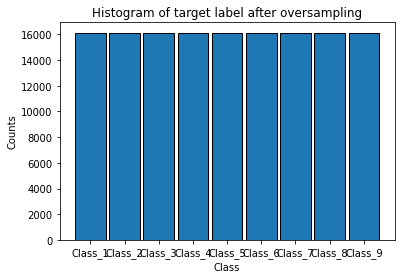

In [40]:
plt.hist(y_ovrsamp, rwidth = 0.9, edgecolor = 'black', bins = np.arange(0, 10) - 0.5)

plt.title('Histogram of target label after oversampling')
plt.xlabel("Class")
plt.ylabel("Counts")

In [41]:
# Train/test split - with oversampling
X_ovrsamp_train, X_ovrsamp_test, y_ovrsamp_train, y_ovrsamp_test = train_test_split(X_ovrsamp, y_ovrsamp, stratify = None, random_state = 0)

In [42]:
names = []
accuracy_scores = []
precision_scores = []
precision_scores_onevsall = []
recall_scores = []
recall_scores_onevsall = []
f1_scores = []
f1_scores_onevsall = []

for name, model in models:
    model.fit(X_ovrsamp_train, y_ovrsamp_train)
    y_pred = model.predict(X_ovrsamp_test)
    accuracy_scores.append(accuracy_score(y_ovrsamp_test, y_pred))
    precision_scores.append(precision_score(y_ovrsamp_test, y_pred, average = 'weighted'))
    precision_scores_onevsall.append(precision_score(y_ovrsamp_test, y_pred, average = None))
    recall_scores.append(recall_score(y_ovrsamp_test, y_pred, average = 'weighted'))
    recall_scores_onevsall.append(recall_score(y_ovrsamp_test, y_pred, average = None))
    f1_scores.append(f1_score(y_ovrsamp_test, y_pred, average = 'weighted'))
    f1_scores_onevsall.append(f1_score(y_ovrsamp_test, y_pred, average = None))
    names.append(name)

In [43]:
#Overall metrics
tr_split_all = pd.DataFrame({'Name': names, 'Accuracy Score': accuracy_scores, 'Precision Score': precision_scores, 'Recall Score': recall_scores, 'F1 Score': f1_scores}).sort_values(by = 'Accuracy Score', ascending = False)
tr_split_all

,Name,Accuracy Score,Precision Score,Recall Score,F1 Score
4,RF,0.956637,0.956658,0.956637,0.956269
1,DT,0.923804,0.923470,0.923804,0.921710
0,KNN,0.873108,0.872970,0.873108,0.870921
2,MNB,0.665968,0.677206,0.665968,0.661423
3,GNB,0.593742,0.610153,0.593742,0.585384


In [44]:
#One-vs-all precision score
tr_split_precision_onevsall = pd.DataFrame(data = np.array(precision_scores_onevsall), index = names, columns = [otto_data['target'].unique()])
tr_split_precision_onevsall

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
KNN,0.884000,0.733354,0.682849,0.805430,0.987479,0.966268,0.900426,0.953421,0.940985
DT,0.960915,0.841425,0.777219,0.911369,0.994087,0.966214,0.943128,0.954258,0.960973
MNB,0.538117,0.528804,0.462921,0.468335,0.961644,0.822051,0.794556,0.824768,0.691070
GNB,0.532468,0.399875,0.418460,0.477901,0.680071,0.856868,0.671797,0.858451,0.593626
RF,0.989453,0.883834,0.841108,0.974216,0.998515,0.989408,0.968712,0.981362,0.982247


In [45]:
#One-vs-all recall score
tr_split_recall_onevsall = pd.DataFrame(data = np.array(recall_scores_onevsall), index = names, columns = [otto_data['target'].unique()])
tr_split_recall_onevsall

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
KNN,0.985385,0.589396,0.701856,0.932635,0.996778,0.879643,0.950562,0.897004,0.924570
DT,0.998761,0.658200,0.852056,0.998004,1.000000,0.899455,0.993758,0.934885,0.980098
MNB,0.564776,0.529716,0.258275,0.765719,0.956877,0.817979,0.612235,0.659569,0.823342
GNB,0.345306,0.629840,0.253511,0.561128,0.942999,0.772412,0.501373,0.557069,0.773464
RF,0.999257,0.804932,0.890672,0.999251,1.000000,0.948489,0.997253,0.977717,0.992383


In [46]:
#One-vs-all f1 score
tr_split_f1_onevsall = pd.DataFrame(data = np.array(f1_scores_onevsall), index = names, columns = [otto_data['target'].unique()])
tr_split_f1_onevsall

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
KNN,0.931943,0.653541,0.692222,0.864377,0.992107,0.920923,0.924815,0.924353,0.932705
DT,0.979473,0.738619,0.812919,0.952721,0.997035,0.931640,0.967781,0.944472,0.970442
MNB,0.551124,0.529260,0.331563,0.581195,0.959255,0.820010,0.691581,0.732976,0.751430
GNB,0.418933,0.489178,0.315740,0.516181,0.790239,0.812451,0.574206,0.675676,0.671717
RF,0.994331,0.842540,0.865181,0.986575,0.999257,0.968517,0.982776,0.979536,0.987289


In [47]:
#Keep the test set fixed, i.e., we are doing oversampling only on the training set
names_1 = []
accuracy_scores_1 = []
precision_scores_1 = []
precision_scores_onevsall_1 = []
recall_scores_1 = []
recall_scores_onevsall_1 = []
f1_scores_1 = []
f1_scores_onevsall_1 = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores_1.append(accuracy_score(y_test, y_pred))
    precision_scores_1.append(precision_score(y_test, y_pred, average = 'weighted'))
    precision_scores_onevsall_1.append(precision_score(y_test, y_pred, average = None))
    recall_scores_1.append(recall_score(y_test, y_pred, average = 'weighted'))
    recall_scores_onevsall_1.append(recall_score(y_test, y_pred, average = None))
    f1_scores_1.append(f1_score(y_test, y_pred, average = 'weighted'))
    f1_scores_onevsall_1.append(f1_score(y_test, y_pred, average = None))
    names_1.append(name)

In [48]:
#Overall metrics for the test set fixed
tr_split_all_1 = pd.DataFrame({'Name': names_1, 'Accuracy Score': accuracy_scores_1, 'Precision Score': precision_scores_1, 'Recall Score': recall_scores_1, 'F1 Score': f1_scores_1}).sort_values(by = 'Accuracy Score', ascending = False)
tr_split_all_1

,Name,Accuracy Score,Precision Score,Recall Score,F1 Score
4,RF,0.802973,0.803218,0.802973,0.793760
0,KNN,0.770459,0.769658,0.770459,0.764359
1,DT,0.712282,0.714750,0.712282,0.713268
2,MNB,0.660504,0.710804,0.660504,0.675133
3,GNB,0.610666,0.666059,0.610666,0.620385


In [49]:
#One-vs-all precision score for the test set fixed
tr_split_precision_onevsall_1 = pd.DataFrame(data = np.array(precision_scores_onevsall_1), index = names, columns = [otto_data['target'].unique()])
tr_split_precision_onevsall_1

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
KNN,0.531049,0.685066,0.502172,0.625828,0.945668,0.936742,0.732965,0.897989,0.862928
DT,0.379921,0.691352,0.461463,0.447917,0.933036,0.897207,0.472384,0.829573,0.775226
MNB,0.231293,0.706241,0.396731,0.241473,0.897038,0.918153,0.606602,0.893375,0.727395
GNB,0.188202,0.649560,0.430153,0.244828,0.426319,0.941812,0.412322,0.896114,0.616915
RF,0.731518,0.704006,0.621424,0.852273,0.969925,0.929800,0.778189,0.867401,0.861153


In [50]:
#One-vs-all recall score for the test set fixed
tr_split_recall_onevsall_1 = pd.DataFrame(data = np.array(recall_scores_onevsall_1), index = names, columns = [otto_data['target'].unique()])
tr_split_recall_onevsall_1

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
KNN,0.539130,0.821223,0.475090,0.266197,0.968421,0.922093,0.540027,0.888205,0.840668
DT,0.419565,0.708614,0.485876,0.423944,0.942857,0.885982,0.440977,0.818569,0.716995
MNB,0.517391,0.635705,0.274268,0.628169,0.956391,0.819733,0.598372,0.670772,0.817906
GNB,0.291304,0.663670,0.259373,0.500000,0.935338,0.768553,0.472185,0.535291,0.752656
RF,0.408696,0.881898,0.479712,0.422535,0.969925,0.937731,0.571235,0.932733,0.861153


In [51]:
#One-vs-all f1 score for the test set fixed
tr_split_f1_onevsall_1 = pd.DataFrame(data = np.array(f1_scores_onevsall_1), index = names, columns = [otto_data['target'].unique()])
tr_split_f1_onevsall_1

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
KNN,0.535059,0.746991,0.488255,0.373518,0.956909,0.929360,0.621875,0.893070,0.851653
DT,0.398760,0.699877,0.473355,0.435601,0.937921,0.891559,0.456140,0.824034,0.744974
MNB,0.319678,0.669120,0.324324,0.348846,0.925764,0.866156,0.602459,0.766234,0.770000
GNB,0.228669,0.656539,0.323614,0.328704,0.585687,0.846407,0.440228,0.670225,0.678059
RF,0.524407,0.782975,0.541449,0.564972,0.969925,0.933749,0.658842,0.898882,0.861153


## **Hyperparameter tuning - RandomizedSearch**

In [52]:
# from sklearn.model_selection import RandomizedSearchCV

# parameters = {
#     'bootstrap': [True, False],
#     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#     'max_features': ['auto', 'sqrt'],
#     'min_samples_leaf': [1, 2, 4],
#     'min_samples_split': [2, 5, 10],
#     'n_estimators': [200, 400, 500, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
#     'criterion' : ['gini', 'entropy']}

# rf = RandomForestClassifier(n_jobs = -1, random_state = 0)
# clf_standard = RandomizedSearchCV(rf, n_iter = 1200, verbose = 2, param_distributions = parameters, cv = 3)
# clf_standard.fit(X_train, y_train)

In [53]:
# The best parameters from hyperparameter tuning (out of 3600 combinations)
{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'criterion': 'gini', 'bootstrap': False}

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [54]:
#implementation of the best parameters from RandomizedSearch - using original data
base_model = RandomForestClassifier(n_jobs = -1, 
                                    random_state = 0, 
                                    bootstrap = False,
                                    max_depth = 60,
                                    max_features = 'auto',
                                    min_samples_leaf = 1,
                                    min_samples_split = 2, 
                                    n_estimators = 1200,
                                    criterion = 'gini')
base_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=60, n_estimators=1200,
                       n_jobs=-1, random_state=0)

In [55]:
accuracy_score(y_test, base_model.predict(X_test), normalize = True)

0.8131221719457014

In [ ]:
#implementation of the best parameters from RandomizedSearch - using oversampled data
base_model = RandomForestClassifier(n_jobs = -1, 
                                    random_state = 0, 
                                    bootstrap = False,
                                    max_depth = 60,
                                    max_features = 'auto',
                                    min_samples_leaf = 1,
                                    min_samples_split = 2, 
                                    n_estimators = 1200,
                                    criterion = 'gini')
base_model.fit(X_ovrsamp_train, y_ovrsamp_train)

In [ ]:
accuracy_score(y_ovrsamp_test, base_model.predict(X_ovrsamp_test), normalize = True)

NameError: ignored